# Data Science Boot Camp Project 1

## (1) Reading Input Data from Files

In [9]:
import numpy as np
import pandas as pd

In [10]:
#imports
import os
import json
import pyprind


#defining function load_mojo_data
#which will read all data files and return list of dictionaries
#each dictionary = info for one movie
def load_mojo_data(baseDirectory = "/Users/gjs830//GitHub/DataScienceBootcamp/ct16_cap1_ds5/project_1/"):
    """
       Output: List of Dictionary of Movie
    """
    try:
        import numpy as np
        print "Start Loading MOJO DATA:"
        DATA_DIR = os.path.join(baseDirectory,'data', 'boxofficemojo')

        DataFileList = [dataFileName for dataFileName in os.listdir(DATA_DIR) if ".json" in dataFileName ]
        MovieInfoList = []

        n = len(DataFileList)
        bar = pyprind.ProgBar(n, bar_char='X')

        i = 0
        for dataFileName in DataFileList:
            i+=1
            target_file_path = os.path.join(DATA_DIR, dataFileName)
            with open(target_file_path, 'r') as target_file:
                movie = json.load(target_file)


                if type(movie) is not dict:
                    continue
                columnNames = ["alt_title", "director", "domestic_gross", "mojo_slug", "opening_per_theater", \
                               "opening_weekend_take", "production_budget", "release_date_limited", \
                               "release_date_wide", "title", "widest_release", "worldwide_gross", "year"]
                for columnName in columnNames:
                    if columnName not in movie:
                        movie[columnName] = np.nan

                MovieInfoList.append(movie)
            bar.update(item_id = i)
        print "Finish Loading MOJO DATA:"
        return MovieInfoList
    except Exception as ex:
        print "Error loading MOJO data: " + " ".join([str(x) for x in ex.args])
        raise(ex)

def load_critic_data(baseDirectory = "/Users/gjs830//GitHub/DataScienceBootcamp/ct16_cap1_ds5/project_1/"):
    """
       Output: List of Dictionary of Movie
    """
    import numpy as np
    try:
        print "Start Loading CRITIC DATA:"
        DATA_DIR = os.path.join(baseDirectory,'data', 'metacritic')

        DataFileList = [dataFileName for dataFileName in os.listdir(DATA_DIR) if ".json" in dataFileName ]
        CriticInfoList = []

        n = len(DataFileList)
        bar = pyprind.ProgBar(n, bar_char='X')

        i = 0
        for dataFileName in DataFileList:
            i+=1
            target_file_path = os.path.join(DATA_DIR, dataFileName)
            with open(target_file_path, 'r') as target_file:
                critic = json.load(target_file)
                if type(critic) is not dict:
                    continue
                columnNames = ["complete", "director", "genre", "metacritic_page", "metascore", \
                               "num_critic_reviews", "num_user_ratings", "num_user_reviews", \
                               "rating", "release_date", "runtime_minutes", "studio", \
                               "title", "user_score", "year"]
                for columnName in columnNames:
                    if columnName not in critic:
                        critic[columnName] = np.nan
                CriticInfoList.append(critic)
            bar.update(item_id = i)
        print "Finish Loading CRITIC DATA:"
        return CriticInfoList
    except Exception as ex:
        print "Error loading CRITIC data: " + " ".join([str(x) for x in ex.args])
        raise(ex)

In [11]:
movie_dicts = load_mojo_data()
movie_df_raw = pd.DataFrame(movie_dicts)

print movie_df_raw.head(5)
print movie_df_raw.shape

0%                          100%
[XXXXXXXXXXXXXXXXXXXXXXXXXX    ]

Start Loading MOJO DATA:


[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX] | ETA: 00:00:00 | Item ID: 3728
Total time elapsed: 00:00:00


Finish Loading MOJO DATA:
                           alt_title         director  domestic_gross  \
0                 10,000 B.C. (2008)  Roland Emmerich      94784201.0   
1              102 Dalmatians (2000)             None      66957026.0   
2  10 Things I Hate About You (1999)             None      38178166.0   
3                    10 Years (2012)     Jamie Linden        203373.0   
4                  11 Flowers (2013)             None          9213.0   

               mojo_slug  opening_per_theater  opening_weekend_take  \
0                10000bc              10518.0            35867488.0   
1          102dalmatians               7353.0            19883351.0   
2  10thingsihateaboutyou               3668.0             8330681.0   
3                10years               7569.0               22707.0   
4              11flowers               1758.0                3516.0   

   production_budget release_date_limited release_date_wide  \
0        105000000.0                 None    

In [12]:
print movie_df_raw.shape
print movie_df_raw.isnull().sum()

(3728, 13)
alt_title                  0
director                1556
domestic_gross            75
mojo_slug                  0
opening_per_theater      180
opening_weekend_take     180
production_budget       2137
release_date_limited    3435
release_date_wide         10
title                      0
widest_release           152
worldwide_gross          907
year                       7
dtype: int64


In [13]:
critic_dicts = load_critic_data()
critic_df_raw = pd.DataFrame(critic_dicts)

print critic_df_raw.head(5)
print critic_df_raw.shape

0%                          100%
[XXXXXXXXXXXXXX                ] | ETA: 00:00:00 | Item ID: 2226

Start Loading CRITIC DATA:


[XXXXXXXXXXXXXXXXXXXXXXXXXXXXX ] | ETA: 00:00:00 | Item ID: 4611

Finish Loading CRITIC DATA:
  complete         director                        genre  \
0     True       Gil Junger            [Comedy, Romance]   
1     True     Jamie Linden     [Drama, Comedy, Romance]   
2     True  Roland Emmerich  [Adventure, Drama, Fantasy]   
3     True    Stephen Herek  [Adventure, Comedy, Family]   
4     True       Kevin Lima             [Comedy, Family]   

                     metacritic_page  metascore num_critic_reviews  \
0  /movie/10-things-i-hate-about-you       70.0     [18, 7, 1, 26]   
1                    /movie/10-years       61.0     [7, 11, 0, 18]   
2                    /movie/10000-bc       34.0     [4, 8, 17, 29]   
3              /movie/101-dalmatians       49.0      [8, 9, 3, 20]   
4              /movie/102-dalmatians       35.0     [7, 5, 12, 24]   

   num_user_ratings   num_user_reviews rating release_date  runtime_minutes  \
0             175.0     [27, 1, 1, 29]  PG-13   1999-03-31             97.0   
1              12.0       [3, 2,

In [14]:
print critic_df_raw.shape
print critic_df_raw.isnull().sum()

(4765, 16)
complete                 2
director                 2
genre                    2
metacritic_page          2
metascore              177
num_critic_reviews       2
num_user_ratings       284
num_user_reviews         2
rating                   2
release_date             2
runtime_minutes         97
studio                  40
title                    2
unable to retrieve    4763
user_score               2
year                     2
dtype: int64


In [15]:
movie_df_raw['scrubbed_title'] = movie_df_raw['title']
movie_df_raw['scrubbed_title'] = movie_df_raw['scrubbed_title'].str.replace('[^\w]','')
movie_df_raw['scrubbed_title'] = movie_df_raw['scrubbed_title'].str.lower()

critic_df_raw['scrubbed_title'] = critic_df_raw['title']
critic_df_raw['scrubbed_title'] = critic_df_raw['scrubbed_title'].str.replace('[^\w]','')
critic_df_raw['scrubbed_title'] = critic_df_raw['scrubbed_title'].str.lower()

In [16]:
rawDataDF = movie_df_raw.merge(critic_df_raw, how = 'inner', on = ["year", "scrubbed_title"])

In [17]:
print rawDataDF.head(5)

                           alt_title       director_x  domestic_gross  \
0                 10,000 B.C. (2008)  Roland Emmerich      94784201.0   
1              102 Dalmatians (2000)             None      66957026.0   
2  10 Things I Hate About You (1999)             None      38178166.0   
3                    10 Years (2012)     Jamie Linden        203373.0   
4                  11 Flowers (2013)             None          9213.0   

               mojo_slug  opening_per_theater  opening_weekend_take  \
0                10000bc              10518.0            35867488.0   
1          102dalmatians               7353.0            19883351.0   
2  10thingsihateaboutyou               3668.0             8330681.0   
3                10years               7569.0               22707.0   
4              11flowers               1758.0                3516.0   

   production_budget release_date_limited release_date_wide  \
0        105000000.0                 None        2008-03-07   
1       

In [18]:
print rawDataDF.shape

print rawDataDF.isnull().sum()

(3347, 29)
alt_title                  0
director_x              1321
domestic_gross            42
mojo_slug                  0
opening_per_theater      105
opening_weekend_take     105
production_budget       1840
release_date_limited    3073
release_date_wide          3
title_x                    0
widest_release            80
worldwide_gross          720
year                       0
scrubbed_title             0
complete                   0
director_y                 0
genre                      0
metacritic_page            0
metascore                 76
num_critic_reviews         0
num_user_ratings         141
num_user_reviews           0
rating                     0
release_date               0
runtime_minutes           53
studio                    18
title_y                    0
unable to retrieve      3347
user_score                 0
dtype: int64


In [ ]:
import pprint
DirectorList = rawDataDF.director_y.unique()

for director in DirectorList:
    print director

In [ ]:
rawDataDF[rawDataDF.studio.notnull()].

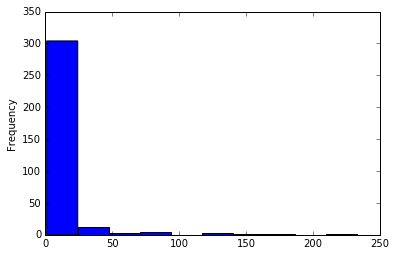

In [122]:

aggregations = {
    'title_x': {
        'total_movies': 'count'
    },
    'domestic_gross': {
        'avarage_gross': 'mean'
    },
    'metascore': {
        'average_metascore': 'mean'
    }
}


studioClassification = rawDataDF[rawDataDF.studio.notnull()].groupby(['studio']).agg(aggregations)
studioClassification['title_x']['total_movies'].head()
studioClassification['title_x']['total_movies'].plot(kind='hist')

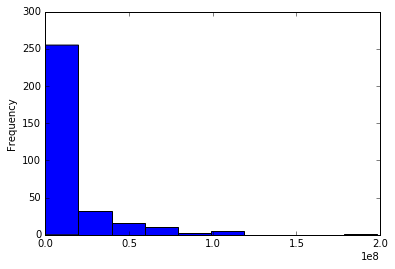

In [132]:
aggregations = {
    'title_x':'count',
    'domestic_gross': 'median',
    'metascore':'mean'}


sc = rawDataDF[rawDataDF.studio.notnull()].groupby(['studio']).agg(aggregations)
sc_df = sc.add_suffix('_Count').reset_index()
sc_df.rename(columns={'title_x_Count': 'movie_count', 'metascore_Count': 'metascore_mean', 'domestic_gross_Count': 'domestic_gross_median'}, inplace=True)
#sc_df['movie_count'].plot(kind='hist')
sc_df['domestic_gross_median'].plot(kind='hist')


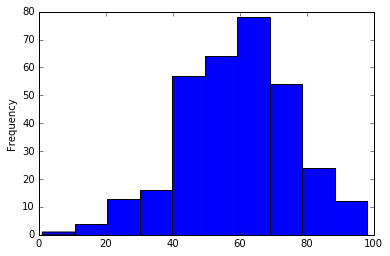

In [133]:
sc_df['metascore_mean'].plot(kind='hist')
sc_df['metascore_mean_bucket'] = sc_df['metascore_mean'].apply(lambda x: 'L' if x <= 40 else 'M' if x <= 70 else 'H')


In [ ]:
sc_df

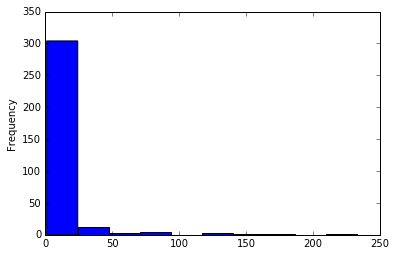

In [110]:
sc_df['movie_count'].plot(kind='hist')

In [136]:
sc_df['domestic_gross_median_bucket'] = sc_df['domestic_gross_median'].apply(lambda x: 'L' if x <= 200000000 else 'M' if x <= 500000000 else 'H')
sc_df['movie_count_bucket'] = sc_df['movie_count'].apply(lambda x: 'S' if x <= 10 else 'M' if x <=25 else 'B') 

In [126]:
sc_df = sc_df[sc_df.studio != '']

In [137]:
sc_df[sc_df.studio == 'Walt Disney Studios Motion Pictures']

studio  movie_count  metascore_mean  \
311  Walt Disney Studios Motion Pictures           45            55.0   

     domestic_gross_median metascore_mean_bucket domestic_gross_median_bucket  \
311             79884879.0                     M                            L   

    movie_count_bucket  
311                  B

In [138]:
sc_df.to_csv('studio.csv', Header=True, encoding = 'utf-8')